In [27]:
# print_function for compatibility with Python 3
from __future__ import print_function
# NumPy and Pandas
import numpy as np
import pandas as pd 

# Matplotlib, and remember to display plots in the notebook
from matplotlib import pyplot as plt 
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns 

# Import LinearRegression and LogisticRegression
from sklearn.linear_model import LinearRegression, LogisticRegression

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
# Print unique classes for 'status' and the first 5 observations for 'status' in the raw dataset
raw_df = pd.read_csv('project_files/employee_data.csv')

print(raw_df.status.unique())
raw_df.status.head()

['Left' 'Employed']


0        Left
1    Employed
2    Employed
3    Employed
4    Employed
Name: status, dtype: object

In [6]:
# Print unique classes for 'status' and the first 5 observations for 'status' in the analytical base table
abt_df = pd.read_csv('analytical_base_table.csv')

print(abt_df.status.unique())
abt_df.status.head()

[1 0]


0    1
1    0
2    0
3    0
4    0
Name: status, dtype: int64

In [7]:
# Input feature
x = np.linspace(0, 1, 100)
# Noise
np.random.seed(555)
noise = np.random.uniform(-0.2, 0.2, 100)

# Target variable
y = ((x + noise) > 0.5).astype(int)


In [8]:
# Reshape x into X
X = x.reshape(100, 1)

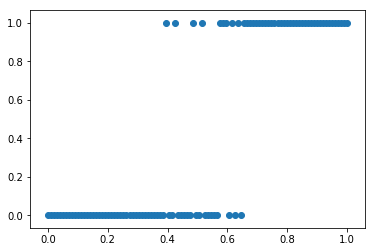

In [9]:
# Plot scatterplot of synthetic dataset
plt.scatter(X, y)

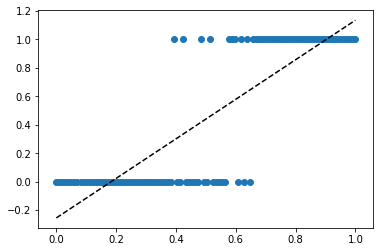

In [10]:
# Linear model
model = LinearRegression()
model.fit(X, y)

# Plot dataset and predictions
plt.scatter(X, y)
plt.plot(X, model.predict(X), 'k--')
plt.show()

In [11]:
# Logistic regression
model = LogisticRegression()
model.fit(X, y)


C:\Users\Holla Alabi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
# predict()
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
# predict_proba()
pred = model.predict_proba(X[:10])

pred

array([[0.89323552, 0.10676448],
       [0.88947376, 0.11052624],
       [0.88559644, 0.11440356],
       [0.88160121, 0.11839879],
       [0.87748575, 0.12251425],
       [0.87324782, 0.12675218],
       [0.86888519, 0.13111481],
       [0.86439572, 0.13560428],
       [0.85977734, 0.14022266],
       [0.85502804, 0.14497196]])

In [14]:
# Class probabilities for first observation
pred[0]

array([0.89323552, 0.10676448])

In [15]:
# Just get the second value for each prediction
pred = [pred[1] for p in pred]

pred

[array([0.88947376, 0.11052624]),
 array([0.88947376, 0.11052624]),
 array([0.88947376, 0.11052624]),
 array([0.88947376, 0.11052624]),
 array([0.88947376, 0.11052624]),
 array([0.88947376, 0.11052624]),
 array([0.88947376, 0.11052624]),
 array([0.88947376, 0.11052624]),
 array([0.88947376, 0.11052624]),
 array([0.88947376, 0.11052624])]

C:\Users\Holla Alabi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


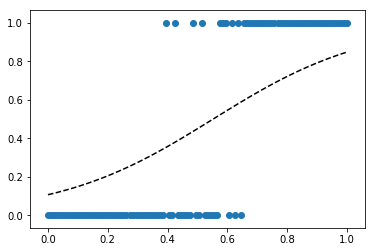

In [16]:
# Logistic regression
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities
pred = model.predict_proba(X)

# Just get the second value (positive class) for each prediction
pred = [p[1] for p in pred]

# Plot dataset and predictions
plt.scatter(X, y)
plt.plot(X, pred, 'k--')
plt.show()

In [17]:
def fit_and_plot_classifier(clf):
    # Fit model
    clf.fit(X, y)
    
    # Predict and take second value of each prediction
    pred = clf.predict_proba(X)
    pred = [p[1] for p in pred]
    
    # Plot
    plt.scatter(X, y)
    plt.plot(X, pred, 'k--')
    plt.show()
    
    # Return fitted model and predictions
    return clf, pred

C:\Users\Holla Alabi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


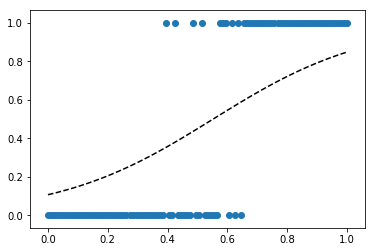

In [18]:
# Logistic regression
clf, pred = fit_and_plot_classifier(LogisticRegression())

C:\Users\Holla Alabi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


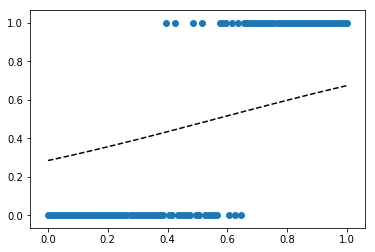

In [19]:
# More regularization
clf, pred = fit_and_plot_classifier(LogisticRegression(C=0.25))

C:\Users\Holla Alabi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


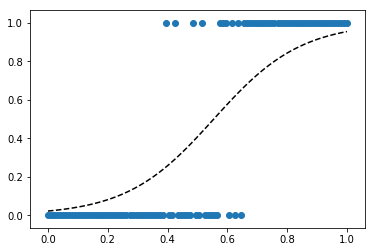

In [20]:
# Less regularization
clf, pred = fit_and_plot_classifier(LogisticRegression(C=4))

C:\Users\Holla Alabi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


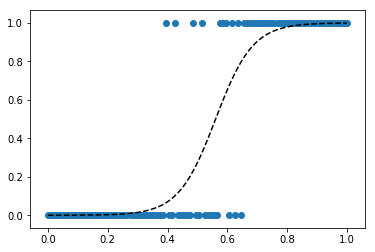

In [21]:
# Basically no regularization
clf, pred = fit_and_plot_classifier(LogisticRegression(C=10000))

C:\Users\Holla Alabi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


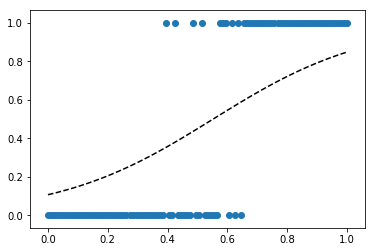

In [23]:
# L1 regularization
clf, pred = fit_and_plot_classifier(LogisticRegression())

In [24]:
# L1-regularized logistic regression
l1 = LogisticRegression(penalty='l1', random_state=123)

# L2-regularized logistic regression
l2 = LogisticRegression(penalty='12', random_state=123)

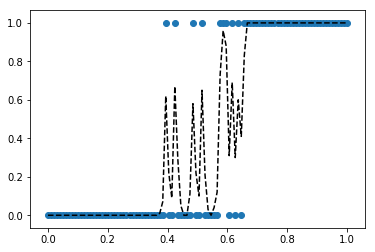

In [26]:
# Random forest classifier
clf, pred = fit_and_plot_classifier(RandomForestClassifier(n_estimators=100))

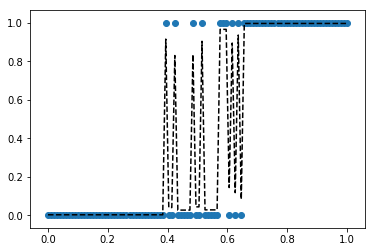

In [28]:
# Random forest classifier
clf, pred = fit_and_plot_classifier(GradientBoostingClassifier(n_estimators=100))